# Implementation of FastICA

In [19]:
import numpy as np
import sys
import matplotlib.pyplot as plt
from scipy import signal
from astropy.io import fits
from sklearn.decomposition import FastICA, PCA
from scipy.stats import pearsonr as pear

In [23]:
in_path_fg = ""
in_path_cs = "Boxes/"

output_path = "Results/"
fname_all = "test_filename"

#fname_foreground = "fg_zeromean_highres_115.000MHz_199.500MHz_4deg_K"
#fname_cs = "cs_zeromean_highres_115.000MHz_199.500MHz_4deg_K"
fname_foreground = "fg_all"
#fname_cs = "21cmFast_cs_PSFindep"
fname_cs = "test"

ncomp = 4

indat_fg = fits.getdata(in_path_fg+fname_foreground+'.fits').T
indata_cs = fits.getdata(in_path_cs+fname_cs+'.fits')
indata_cs = indata_cs/1000
sh = indata_cs.shape
print(sh)
#indata_all = fits.getdata(in_path+fname_all+'.fits')

(342, 128, 128)


In [24]:
#correct orientation
indata_fg = np.swapaxes(indat_fg,1,2)

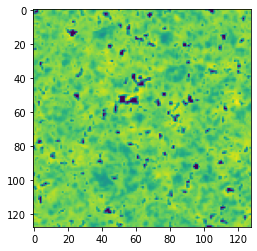

In [25]:
plt.imshow(indata_cs[300,:,:])

In [26]:
indata = indata_fg+indata_cs
#indata = indata_all
cube_data_name = "ZT0.msn_image"

sh = indata.shape
print(sh)
X = np.reshape(indata,(sh[0], sh[1]*sh[2]))

ica1 = FastICA(n_components=ncomp)
model1 = []
S = ica1.fit_transform(X.T)  # Reconstruct signals
A = ica1.mixing_  # Get estimated mixing matrix

model1 = np.reshape(np.matmul(A,S.T),(sh[0], sh[1],sh[2]))

res =  indata-model1
fits.writeto(output_path+cube_data_name+'_ncomp_'+str(ncomp)+'_FastICA_residual.fits',res,overwrite='true')

rec =  indata-res
fits.writeto(output_path+cube_data_name+'_ncomp_'+str(ncomp)+'_FastICA_model.fits',rec,overwrite='true')
print("here")
#print(pear(rec,indata_fg)) Runs VERY slow

(342, 128, 128)
here


In [27]:
#R=np.zeros((sh[0]))
#for ii in range (0,sh[0]):
 #   out = pear(rec[ii,:,:],indata_fg[ii,:,:])
  #  R[ii]= out[0]

#np.plot(R)

## Plot model and foregrounds input

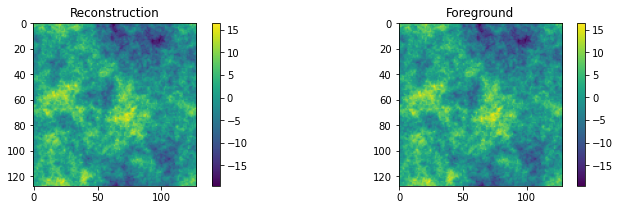

In [28]:

fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(1,2,1)
im0 = ax.imshow(np.real(rec[45,:,:]))
ax.title.set_text('Reconstruction')
fig.colorbar(im0,ax=ax)
clim=im0.properties()['clim']

ax = fig.add_subplot(1,2,2)
im = ax.imshow(indata_fg[45,:,:])
ax.title.set_text('Foreground')
fig.colorbar(im,ax=ax)
clim=im0.properties()['clim']
plt.show()
fig.savefig('models_and_foreground.jpg')
plt.close()



## Plot residual and cs input 

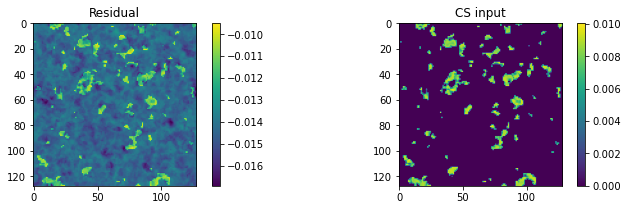

In [29]:
fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(1,2,1)
im0 = ax.imshow(np.real(res[20,:,:]))
ax.title.set_text('Residual')
fig.colorbar(im0,ax=ax)
clim=im0.properties()['clim']

ax = fig.add_subplot(1,2,2)
im = ax.imshow(indata_cs[20,:,:])
ax.title.set_text('CS input')
fig.colorbar(im,ax=ax)
clim=im0.properties()['clim']
plt.show()
fig.savefig('residual_csinput.png')
plt.close()

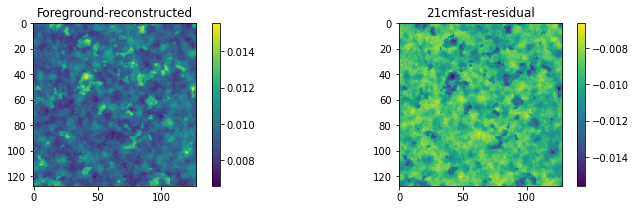

In [30]:
#fg - reconstructed
fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(1,2,1)
im0 = ax.imshow(np.real(rec[45,:,:]) - indata_fg[45,:,:])
ax.title.set_text('Foreground-reconstructed')
fig.colorbar(im0,ax=ax)
clim=im0.properties()['clim']
ax = fig.add_subplot(1,2,2)
im = ax.imshow(np.real(res[45,:,:]) - indata_cs[45,:,:])
ax.title.set_text('21cmfast-residual')
fig.colorbar(im,ax=ax)
clim=im0.properties()['clim']
plt.show()
fig.savefig('difference.png')
plt.close()





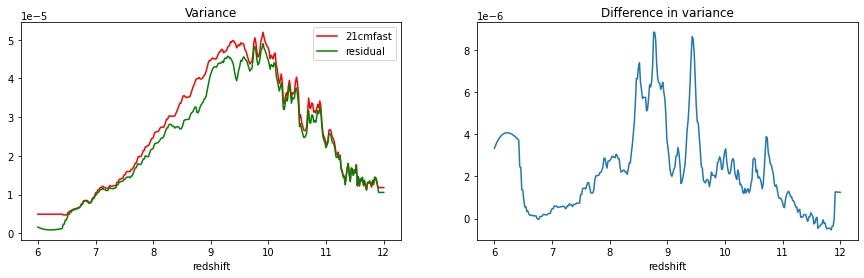

In [31]:
#variance
var_21 = np.zeros(342)
var_rest = np.zeros(342)
for i in range(342):
    var_21[i] = np.var(indata_cs[i,:,:])
    var_rest[i] = np.var(res[i,:,:])

#difference
diff = var_21 - var_rest

x = np.linspace(6,12,342)



fig = plt.figure(figsize=(15,4))
ax = fig.add_subplot(1,2,1)
ax.title.set_text('Variance')
ax.set_xlabel('redshift')
im0 = ax.plot(x,var_21,'r',label='21cmfast')
im1 = ax.plot(x,var_rest,'g',label='residual')
ax.legend()

ax = fig.add_subplot(1,2,2)
im = ax.plot(x,diff)
ax.title.set_text('Difference in variance')
ax.set_xlabel('redshift')
plt.show()
fig.savefig('Variance.png')
plt.close()